In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [5]:
df.shape

(30, 3)

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [8]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [9]:
df['Salary'] = df['Salary'].round(2)

In [10]:
print(df)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

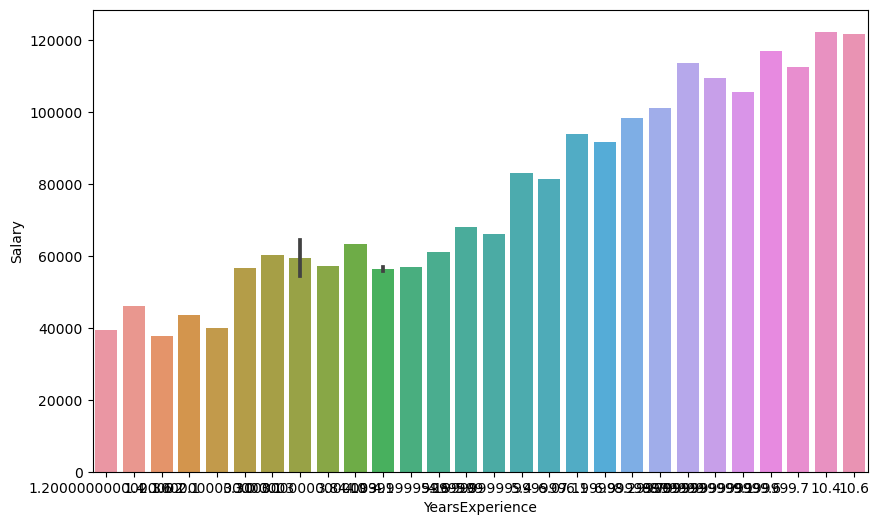

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='YearsExperience',y='Salary',data=df)
plt.show()

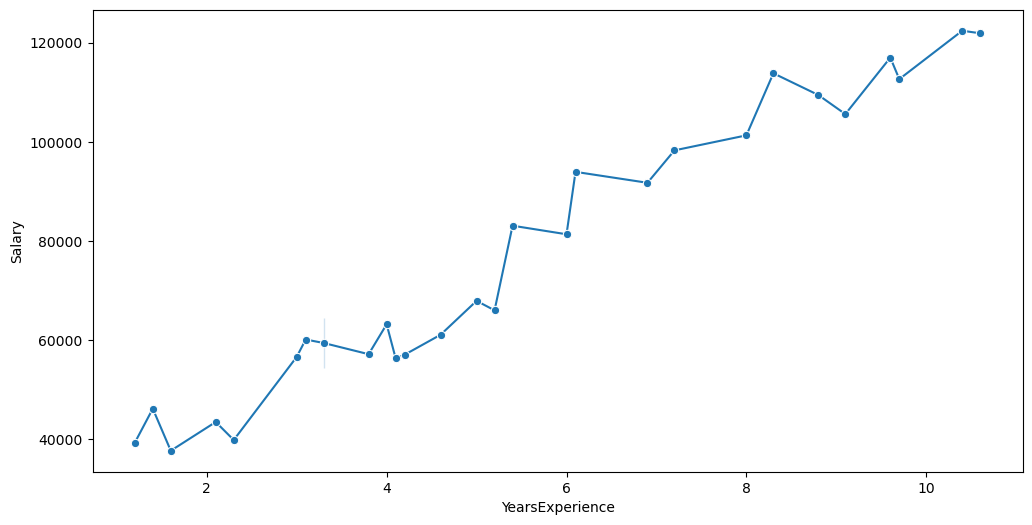

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearsExperience', y='Salary', data=df, marker='o')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

In [92]:
x = df['YearsExperience'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = df['Salary'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred
r2_lr= r2_score(y_test, y_pred)
print(r2_lr)

0.9024461774180498


In [93]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred
r2_dt = r2_score(y_test, y_pred)
print(r2_dt)

0.8021759743735162


In [94]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)
y_pred
r2_rf = r2_score(y_test, y_pred)
print(r2_rf)


0.8752513004196268


In [95]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred=svr_model.predict(X_test)

r2_svr = r2_score(y_test, y_pred)
print(r2_svr)

-0.8641837486109101


In [96]:
r2_values = {'Linear Regression': r2_lr, 'Decision Tree': r2_dt, 'Random Forest': r2_rf, 'SVR': r2_svr}
best_model_name = max(r2_values, key=r2_values.get)
best_r2_score = r2_values[best_model_name]
print(f'Best Model: {best_model_name} with R^2 Score: {best_r2_score}')

Best Model: Linear Regression with R^2 Score: 0.9024461774180498


In [97]:

best_model = {'Linear Regression': regressor, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'SVR': svr_model}[best_model_name]
y_pred_best_model = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best_model)
rmse = mean_squared_error(y_test, y_pred_best_model, squared=False)

print('MAE of the Best Model:',mae)
print('RMSE of the Best Model:', rmse)

MAE of the Best Model: 6286.453830757745
RMSE of the Best Model: 7059.043621901506


In [98]:
new_data = pd.DataFrame({'YearsExperience': [5, 8, 10]})
predictions = best_model.predict(new_data)

print('Predictions for new data:')
print(predictions)

Predictions for new data:
[ 71499.27809463  99770.72406372 118618.35470978]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
